# Deep Learning Systems - Individual Project - 2023 Autumn - Lucian Baciu

---

## Palmer Penguin Dataset



# 1. Dataset description

The palmerpenguins data contains size measurements for three penguin species: **Adelie**, **Chinstrap**, and **Gentoo**, observed on three islands in the Palmer Archipelago, Antarctica.

The dataset contains 344 rows, each representing one unique penguin, and 8 collumns, representing various aspects about the penguins, namely: **species**, **island**, **bill_length_mm**, **bill_depth_mm**, **flipper_length_mm**, **body_mass_g**, **sex** and **year** of taken measurement.

The dataset has few missing values, most notably in the **sex** cathegory.

It is usually compared to the Iris dataset because of its simplicity and ease of teaching.

# 2. Goals and objectives

- Exploring the data through numeric indicators and data plots
- Calculating summary statistics, like mean, median, or standard deviation
- Finding out the differences between each penguin species
- Dealing with missing data, outliers
- Doing classification tasks through Machine Learning algorithms and Neural Networks (In my project I try to train the machine in a classification task with the target variable being the species)
- Finding out which approach is best suit for my goal, and which parameters are best to use

# 3. Data preparation and exploratory data analysis.

Installing pandas library to environment.

In [233]:
!pip install pandas

Importing the library for further use.

In [234]:
import pandas as pd

I chose X dataset because... >It is straightforward<

Dataset description... >has missing values<

Other relevant text...

Goals... >Classification<

Importing X dataset.

In [235]:
df = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Info about the dataset

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [237]:
descriptive_stats = df.describe()
descriptive_stats

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


Finding if there are any and the number of missing values.

In [238]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

Droping the rows with missing values.

In [239]:
dfa = df.dropna()

Plotting a histogram for the penguin boddy mass in grams depending on species.

species
Adelie       Axes(0.125,0.11;0.775x0.77)
Chinstrap    Axes(0.125,0.11;0.775x0.77)
Gentoo       Axes(0.125,0.11;0.775x0.77)
Name: body_mass_g, dtype: object

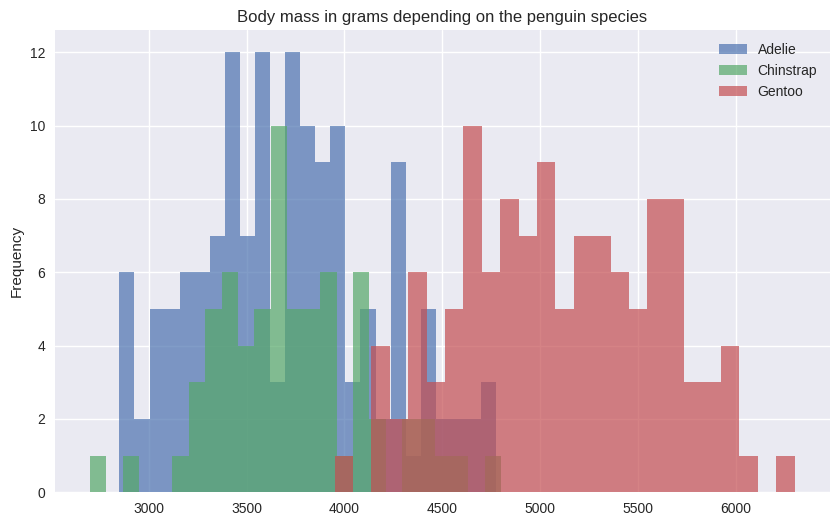

In [240]:
dfa.groupby('species')['body_mass_g'].plot.hist(figsize = (10, 6), title = "Body mass in grams depending on the penguin species", grid = True, legend = True, alpha = 0.7, bins = 25)

Plotting a histogram for the penguin body mass relative to flipper length, colored according to species.

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

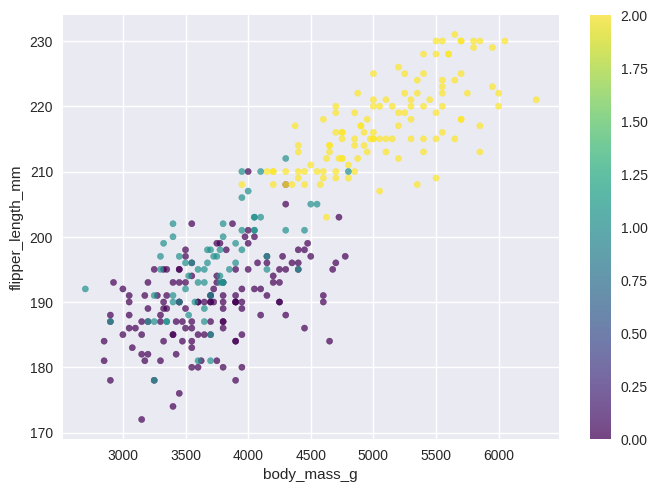

In [241]:
dfa.plot.scatter(x='body_mass_g', y='flipper_length_mm', c = dfa['species'].astype('category').cat.codes, colormap='viridis', alpha=0.7, legend = True)

In [242]:
!pip install seaborn

<ipython-input-243-128f9ba52d1a>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


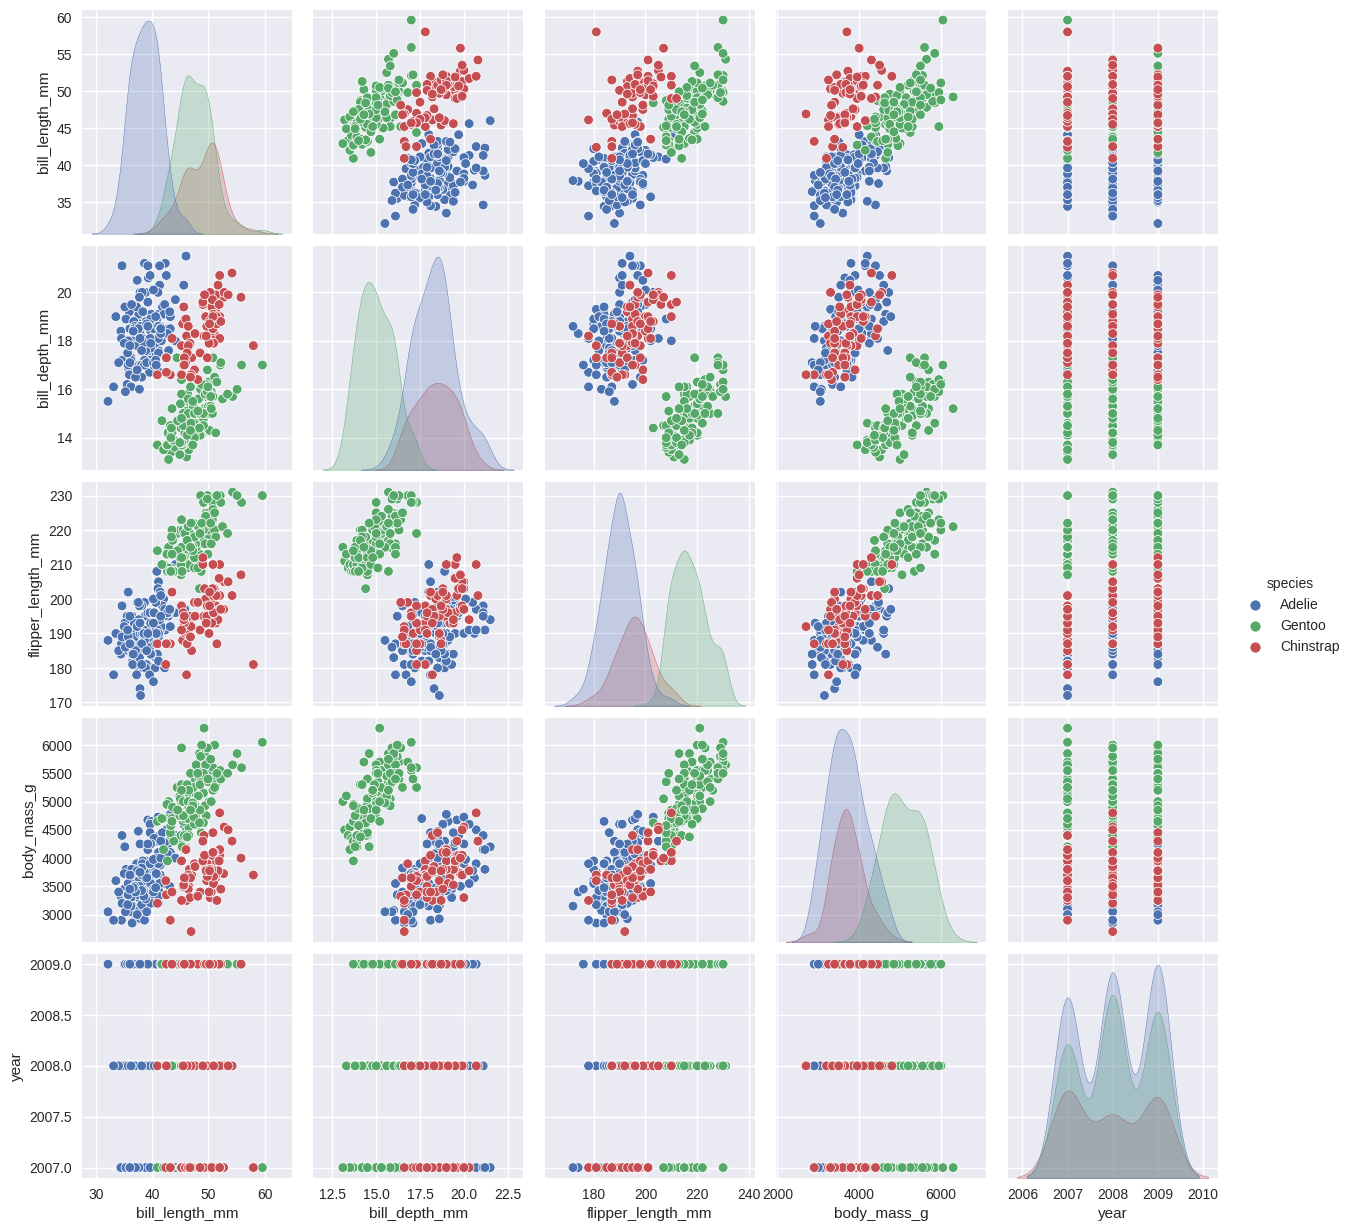

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

sns.pairplot(dfa, hue='species', height=2.5);

Computing the correlation coefficients using all 3 methods.

In [244]:
dfa.corr(method = 'pearson', min_periods = 1)

<ipython-input-244-5fc44eba97ff>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfa.corr(method = 'pearson', min_periods = 1)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


In [245]:
dfa.corr(method = 'kendall', min_periods = 1)

<ipython-input-245-b2a4a42ed4be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfa.corr(method = 'kendall', min_periods = 1)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.118240,0.481989,0.427760,0.032718
bill_depth_mm,-0.118240,1.000000,-0.277464,-0.192372,-0.042776
flipper_length_mm,0.481989,-0.277464,1.000000,0.661460,0.121408
body_mass_g,0.427760,-0.192372,0.661460,1.000000,0.014931
year,0.032718,-0.042776,0.121408,0.014931,1.000000


In [246]:
dfa.corr(method = 'spearman', min_periods = 1)

<ipython-input-246-662d4c6e4637>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfa.corr(method = 'spearman', min_periods = 1)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.213859,0.669754,0.576480,0.042897
bill_depth_mm,-0.213859,1.000000,-0.517317,-0.429283,-0.057061
flipper_length_mm,0.669754,-0.517317,1.000000,0.840390,0.155801
body_mass_g,0.576480,-0.429283,0.840390,1.000000,0.018449
year,0.042897,-0.057061,0.155801,0.018449,1.000000


Eliminating outliers using the interquartile method

In [247]:
# Using the dataframe with dropped missing values. Selecting only numerical types:
dfb = dfa.select_dtypes(include=['int', 'float'])

# Calculating the Interquartile range (IQR)
Q1 = dfb.quantile(0.25)
Q3 = dfb.quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers which are furthen than Q3+1.5*IQR and below Q1-1.5*IQR
mask = (dfb < (Q1 - 1.5 * IQR)) | (dfb > (Q3 + 1.5 * IQR))
dfc = dfb[~(mask).any(axis=1)]
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     333 non-null    float64
 1   bill_depth_mm      333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
 4   year               333 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 15.6 KB


In [248]:
dfd = dfa
dfd['bill_length_mm'] = dfc['bill_length_mm']
dfd['bill_depth_mm'] = dfc['bill_depth_mm']
dfd['flipper_length_mm'] = dfc['flipper_length_mm']
dfd['body_mass_g'] = dfc['body_mass_g']
dfd['year'] = dfc['year']
dfd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


<ipython-input-248-48bbf98216a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd['bill_length_mm'] = dfc['bill_length_mm']
<ipython-input-248-48bbf98216a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd['bill_depth_mm'] = dfc['bill_depth_mm']
<ipython-input-248-48bbf98216a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [249]:
dfd.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Applying one-hot encoding for transforming cathegorical data into numerical (features 'island' and 'sex').

In [250]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

label = le.fit_transform(dfd['island'])

dfd["island"] = label

label = le.fit_transform(dfd['sex'])

dfd["sex"] = label

dfd

<ipython-input-250-0e67768d6981>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd["island"] = label
<ipython-input-250-0e67768d6981>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd["sex"] = label


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,2,39.1,18.7,181.0,3750.0,1,2007
1,Adelie,2,39.5,17.4,186.0,3800.0,0,2007
2,Adelie,2,40.3,18.0,195.0,3250.0,0,2007
4,Adelie,2,36.7,19.3,193.0,3450.0,0,2007
5,Adelie,2,39.3,20.6,190.0,3650.0,1,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,1,55.8,19.8,207.0,4000.0,1,2009
340,Chinstrap,1,43.5,18.1,202.0,3400.0,0,2009
341,Chinstrap,1,49.6,18.2,193.0,3775.0,1,2009
342,Chinstrap,1,50.8,19.0,210.0,4100.0,1,2009


In [251]:
#Normalization = (variable-variable_minim)/(varuiable_maxim-variable_minim)
numeric_cols = dfd.select_dtypes(include=['number']).columns
normalized_df = (dfd[numeric_cols] - dfd[numeric_cols].min()) / (dfd[numeric_cols].max() - dfd[numeric_cols].min())

normalized_df.head() # print the first rows of the normalized data set

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0,0.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.0,0.0
2,1.0,0.298182,0.583333,0.389831,0.152778,0.0,0.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.0,0.0
5,1.0,0.261818,0.892857,0.305085,0.263889,1.0,0.0


In [252]:
dfd.iloc[:, [1, 2, 3, 4, 5, 6, 7]] = normalized_df.values

<ipython-input-252-d6a86f2064a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd.iloc[:, [1, 2, 3, 4, 5, 6, 7]] = normalized_df.values
<ipython-input-252-d6a86f2064a3>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dfd.iloc[:, [1, 2, 3, 4, 5, 6, 7]] = normalized_df.values


# 4. Machine learning algorithm using KNN

In [253]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X = dfd[['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year']]
y = dfd['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 84).fit(X_train, y_train)

accuracyKNN = knn.score(X_test, y_test)
accuracyKNN

0.7857142857142857

# 5. Neural networks
I am using FNN (feedforward neural network) and MLP (multilayer perceptron) because...

# 6. Estimation of classification accuracy.

6.a. FNN

In [254]:
!pip install tensorflow

In [255]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import models, layers

dfe = dfd

# Encode the target variable
le = LabelEncoder()
dfe.loc[:, 'species'] = le.fit_transform(dfe['species'])

# Split the dataset into features and target
X = dfe.drop('species', axis=1)
y = dfe['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert features to NumPy arrays with float32 data type
X_train = np.array(X_train, dtype='float32')
X_test = np.array(X_test, dtype='float32')

# Build the Feedforward Neural Network (FNN) model
model = models.Sequential()
model.add(layers.Dense(12, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))  # Output layer with 3 neurons for the 3 classes

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=55, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
accuracyFNN = accuracy
print(f'Test Accuracy: {accuracy}')



<ipython-input-255-52dc6f652e2e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfe.loc[:, 'species'] = le.fit_transform(dfe['species'])
<ipython-input-255-52dc6f652e2e>:15: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dfe.loc[:, 'species'] = le.fit_transform(dfe['species'])


Epoch 1/55
14/14 [==============================] - 2s 35ms/step - loss: 1.0448 - accuracy: 0.5991 - val_loss: 1.0271 - val_accuracy: 0.6667
Epoch 2/55
14/14 [==============================] - 0s 17ms/step - loss: 1.0239 - accuracy: 0.6698 - val_loss: 1.0090 - val_accuracy: 0.7037
Epoch 3/55
14/14 [==============================] - 0s 17ms/step - loss: 1.0046 - accuracy: 0.6887 - val_loss: 0.9930 - val_accuracy: 0.6852
Epoch 4/55
14/14 [==============================] - 0s 13ms/step - loss: 0.9816 - accuracy: 0.6792 - val_loss: 0.9709 - val_accuracy: 0.6481
Epoch 5/55
14/14 [==============================] - 0s 7ms/step - loss: 0.9542 - accuracy: 0.6887 - val_loss: 0.9416 - val_accuracy: 0.6481
Epoch 6/55
14/14 [==============================] - 0s 9ms/step - loss: 0.9194 - accuracy: 0.6934 - val_loss: 0.9102 - val_accuracy: 0.6296
Epoch 7/55
14/14 [==============================] - 0s 10ms/step - loss: 0.8844 - accuracy: 0.7123 - val_loss: 0.8778 - val_accuracy: 0.6667
Epoch 8/55
14/1

Increasing the number of epochs greatly increases the accuracy but also increases the compilation time.

6.b. MLP

In [256]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [257]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

In [258]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense

np.random.seed(1337)

X_train_array = X_train.to_numpy()

model = Sequential()
model.add(InputLayer(input_shape = X_train_array[0].shape))
model.add(Dense(8, activation="relu", name="layer1"))
model.add(Dense(8, activation="relu", name="layer2"))
model.add(Dense(3, activation = "softmax", name="layer3"))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 8)                 64        
                                                                 
 layer2 (Dense)              (None, 8)                 72        
                                                                 
 layer3 (Dense)              (None, 3)                 27        
                                                                 
Total params: 163 (652.00 Byte)
Trainable params: 163 (652.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [259]:
recall = tf.keras.metrics.Recall()
precision = tf.keras.metrics.Precision()

model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy", precision, recall])

history = model.fit(X_train, y_train_one_hot, epochs = 25, batch_size=5, verbose=0, validation_data=(X_test, y_test_one_hot))

In [260]:
score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
accuracyMLP = score[1]

Test loss: 0.13720877468585968
Test accuracy: 0.9552238583564758


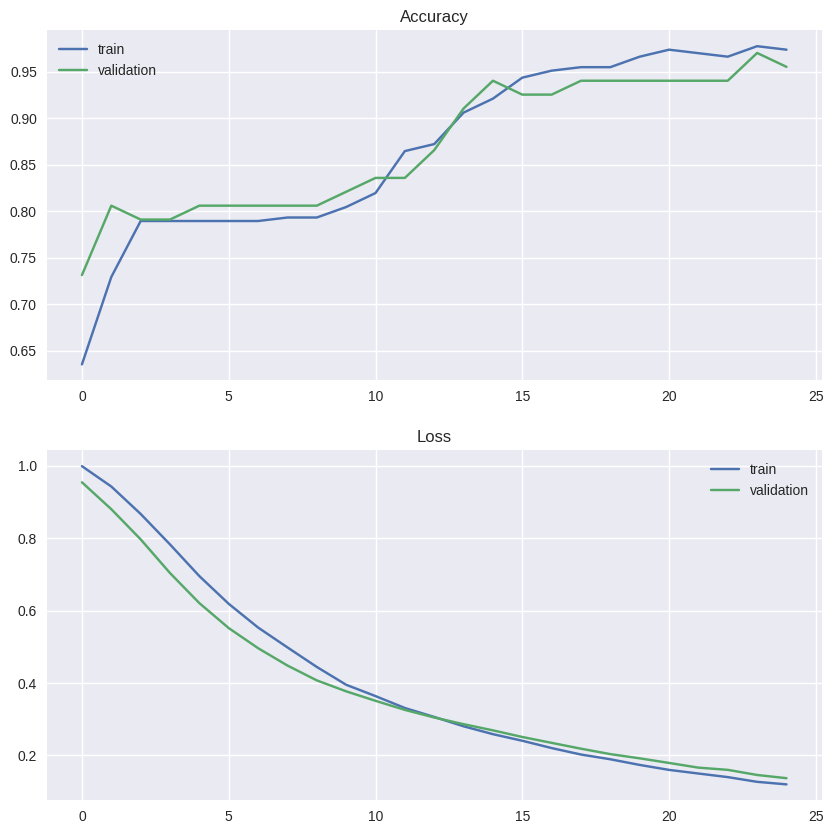

In [261]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax1.plot(train_accuracy, label='train')
ax1.plot(val_accuracy, label='validation')
ax1.set_title("Accuracy")

ax2.plot(train_loss, label='train')
ax2.plot(val_loss, label='validation')
ax2.set_title("Loss")

ax1.legend()
ax2.legend();

# 7. Analyzing the paramaters of the machine learning algorithm.

In [262]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

# Create the GridSearchCV object
grid_search = GridSearchCV(knn_model, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'n_neighbors': 3, 'weights': 'uniform'}


# 8. KNN with best parameters selected

In [263]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

X = dfd[['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year']]
y = dfd['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Create KNN model
knn = KNeighborsClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_knn = grid_search.best_estimator_

# Evaluate the best model
accuracy = best_knn.score(X_test, y_test)
print("Accuracy with best parameters:", accuracy)

Accuracy with best parameters: 1.0


In [264]:
print("KNN Accuracy:", accuracyKNN)
print("FNN Accuracy:", accuracyFNN)
print("MLP Accuracy:", accuracyMLP)

KNN Accuracy: 0.7857142857142857
FNN Accuracy: 0.9850746268656716
MLP Accuracy: 0.9552238583564758


# 9. Conclusions
Overall there is no best method to use in classification tasks that would suit every single dataset, and, after using KNN machine learning algorithm and FNN and MLP neural networks, I came to the conclusion that neural networks are not always better than machine learning algorithms.
Every task requires different methods, and the best methods can only be chosen through experience.